In [7]:
from sklearn.manifold import MDS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Read Data
The Dissimilarity Matrix U is already given.

In [8]:
# Read Dissimilarity Matrix U
df = pd.read_csv("staedte.csv", header=None)
df.head(20)

,0,1,2,3,4,5,6,7,8,9
0,0,45,17,44,42,32,31,27,25,11
1,45,0,34,14,12,21,35,37,25,39
2,17,34,0,30,18,5,4,22,9,7
3,44,14,30,0,1,15,24,43,38,41
4,42,12,18,1,0,2,13,40,28,33
5,32,21,5,15,2,0,10,29,16,19
6,31,35,4,24,13,10,0,36,23,20
7,27,37,22,43,40,29,36,0,3,8
8,25,25,9,38,28,16,23,3,0,6
9,11,39,7,41,33,19,20,8,6,0


In [9]:
mds = MDS(n_components=2, metric=False, verbose=True, dissimilarity="precomputed")
# Get 2D embedding
scaled_data = mds.fit_transform(df)
# Transform to Pandas Df
scaled_data = pd.DataFrame(scaled_data)
# Preview
scaled_data.head(20)

breaking at iteration 7 with stress 1.4187990775742256
breaking at iteration 26 with stress 0.9383071931858629
breaking at iteration 27 with stress 0.35606211623644024
breaking at iteration 11 with stress 1.1542219549323278


,0,1
0,0.564624,-0.269643
1,-0.299572,-0.429426
2,0.064151,0.150748
3,-0.598135,-0.142251
4,-0.464252,0.044520
5,-0.051322,0.486576
6,-0.259118,0.253419
7,0.593340,-0.047956
8,0.107187,-0.207936
9,0.360671,0.182923


In [10]:
# Get Stress Value
print(f"Final STRESS Value: {mds.stress_:.4f}")

Final STRESS Value: 0.3561


# Visualization

In [11]:
scaled_data["city"] = ["Basel", "Berlin", "Frankfurt", "Hamburg", "Hannover", "Kassel", "Köln", "München", "Nürnberg", "Stuttgart"]
scaled_data.head(5)

,0,1,city
0,0.564624,-0.269643,Basel
1,-0.299572,-0.429426,Berlin
2,0.064151,0.150748,Frankfurt
3,-0.598135,-0.142251,Hamburg
4,-0.464252,0.044520,Hannover


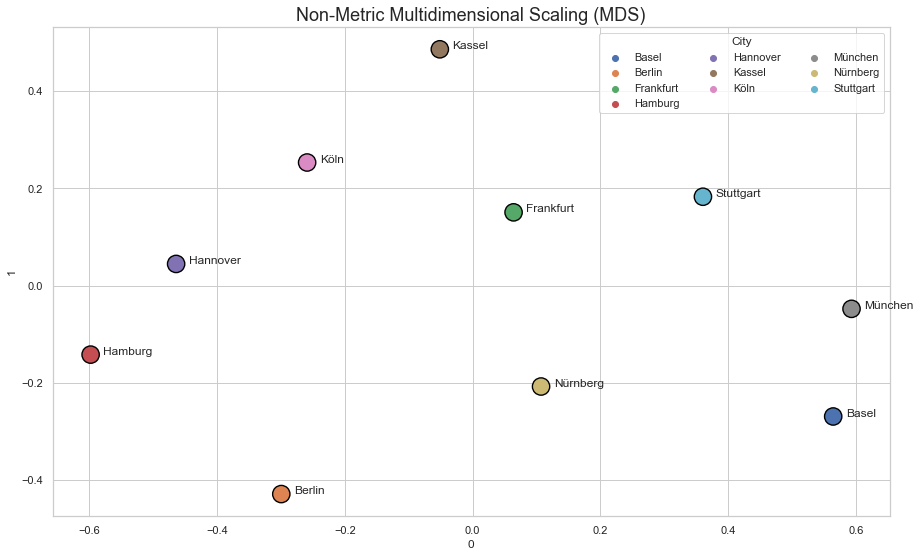

In [12]:
plt.figure(figsize=(15, 9))
plt.title("Non-Metric Multidimensional Scaling (MDS)", size=18)
sns.scatterplot(x = scaled_data[0], y = scaled_data[1], hue = scaled_data["city"], s=300, edgecolor="black")
for i in range(len(scaled_data)):
    x_pos = scaled_data.iloc[i, 0]
    y_pos = scaled_data.iloc[i, 1]
    offset = 0.02
    plt.annotate(s=scaled_data.loc[i, "city"], xy = (x_pos + offset, y_pos))
plt.legend(ncol=3, title = "City")
plt.show()